This project is addressing factors which can influencce price negotiations. We need this data to predict the price of houses
as accurately as possitble.

In [2]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn utilities
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
# prediction
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
train_data = pd.read_csv(r"C:\Users\jaysa\Desktop\train.csv")
test_data = pd.read_csv(r"C:\Users\jaysa\Desktop\test.csv")
train_test_data = [train_data, test_data]
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
 train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Summary:
 1. Several features have a lot of empty values. We will drop them all.
 2. We have too many features to use so we'll reduce feature count next.
 3. Several features have the same values. It could be tranform to binary feature.


In [10]:
id_test = test_data['Id'].tolist()

for data in train_test_data:
    data.drop(['Id'], axis=1, inplace=True)
print(train_data.shape, test_data.shape)

(1460, 80) (1459, 79)


In [11]:
train_data_num = train_data.select_dtypes(exclude=['object'])
test_data_num = test_data.select_dtypes(exclude=['object'])
train_data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


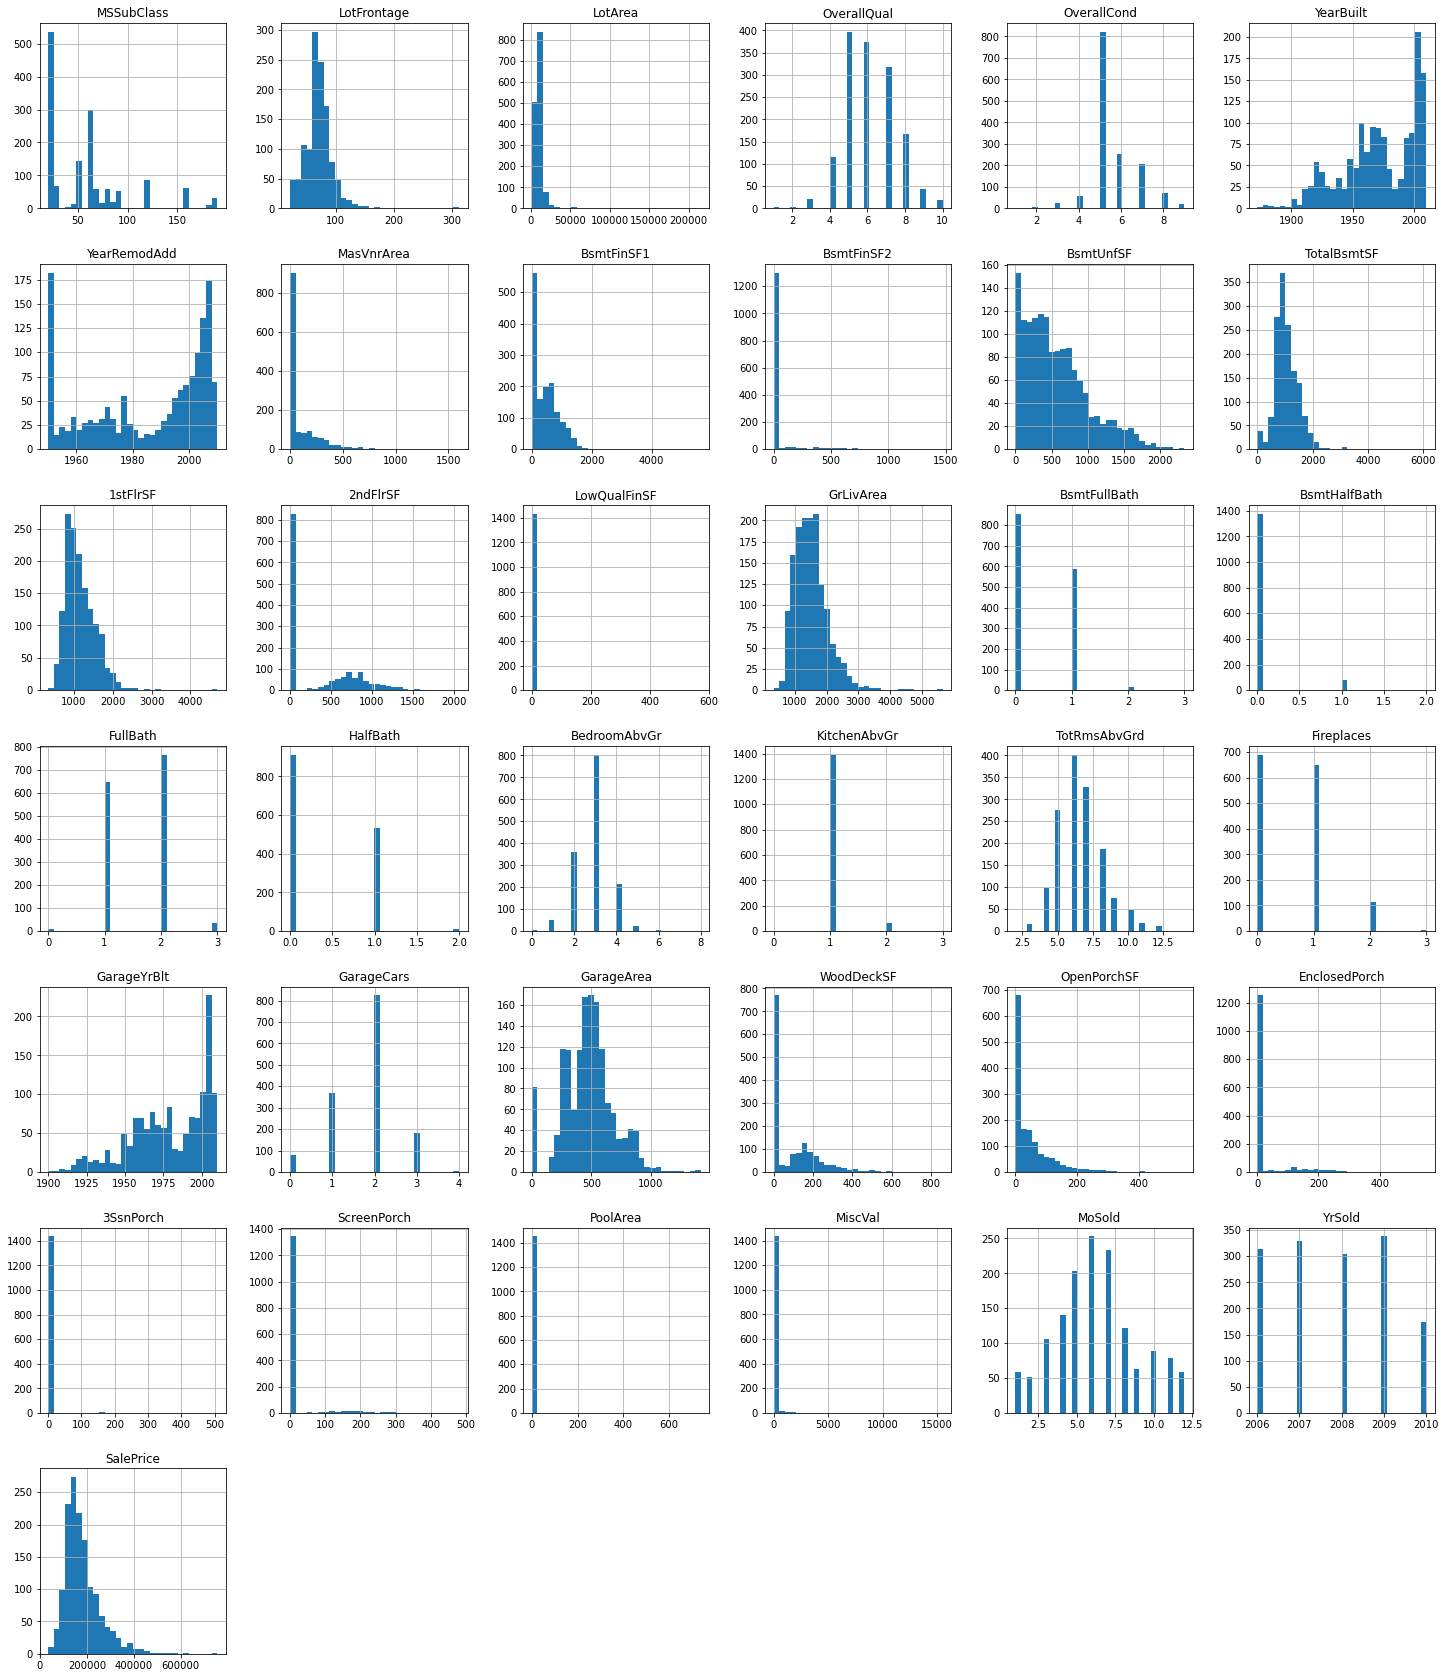

In [12]:
train_data_num.hist(figsize=(25, 30), bins=30);

We can see that dataset contains few low variance features. We'll can drop features more than 95% similar values because they have minor impact on our predictions.

In [13]:
selector = VarianceThreshold(threshold=0.05)

selector.fit(train_data_num.iloc[:, :-1])

sup = selector.get_support()

print('Number of retained features: ', sum(sup))

print('Number low-variance features: ', sum(~sup))

low_var_fet = train_data_num.drop(['SalePrice'], axis=1).loc[:, ~sup].columns.values

print('Low-variance features: ', low_var_fet)

print('Before: ',train_data_num.shape, test_data_num.shape)
train_data_num.drop(low_var_fet, axis=1, inplace=True)
test_data_num.drop(low_var_fet, axis=1, inplace=True)
print('After: ', train_data_num.shape, test_data_num.shape)

Number of retained features:  35
Number low-variance features:  1
Low-variance features:  ['KitchenAbvGr']
Before:  (1460, 37) (1459, 36)
After:  (1460, 36) (1459, 35)


C:\Users\jaysa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


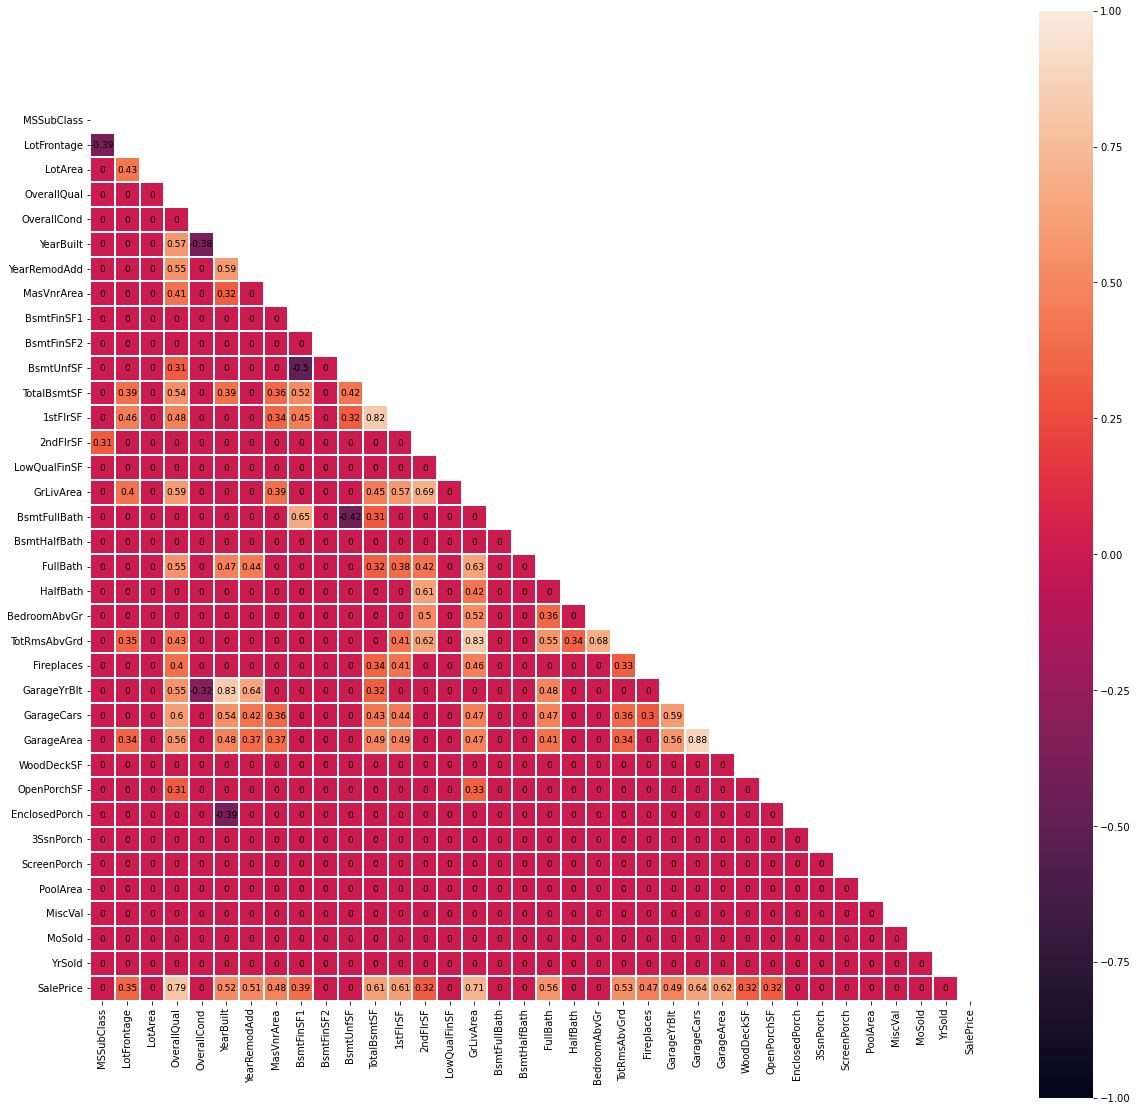

In [14]:
pd.options.display.float_format = "{:,.2f}".format

corr_mat = train_data_num.corr('pearson')

# replace very weak correlation
corr_mat[(corr_mat < 0.3) & (corr_mat > -0.3)] = 0

# define triangular mask for better visibility
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, mask=mask, vmax=1.0, vmin=-1.0, square=True, annot=True, annot_kws={"size": 9, "color": "black"}, linewidths=0.1, cmap='rocket');

Extraction of SalePrice Correlation:

In [15]:
corr_features = corr_mat['SalePrice'].drop(['SalePrice'])
corr_features.sort_values(ascending=False)

OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
FullBath        0.56
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
GarageYrBlt     0.49
MasVnrArea      0.48
Fireplaces      0.47
BsmtFinSF1      0.39
LotFrontage     0.35
WoodDeckSF      0.32
2ndFlrSF        0.32
OpenPorchSF     0.32
MoSold          0.00
EnclosedPorch   0.00
3SsnPorch       0.00
MiscVal         0.00
ScreenPorch     0.00
PoolArea        0.00
MSSubClass      0.00
BsmtHalfBath    0.00
BedroomAbvGr    0.00
HalfBath        0.00
BsmtFullBath    0.00
LowQualFinSF    0.00
BsmtUnfSF       0.00
BsmtFinSF2      0.00
OverallCond     0.00
LotArea         0.00
YrSold          0.00
Name: SalePrice, dtype: float64

There are various strength of correlation:
* < 0.3 - very weak correlation (on table it is replaced by 0)
* \> 0.3 & < 0.5 - weak correaltion
* \> 0.5 & < 0.7 - moderate correlation
* \> 0.7 - strong correlation

It also works for negative coefficient

Now we can investigate the extracted features more in depth.

Let's consider separately the signs belonging to each degree of correlation.

Strongly correlated features:  ['OverallQual', 'GrLivArea']


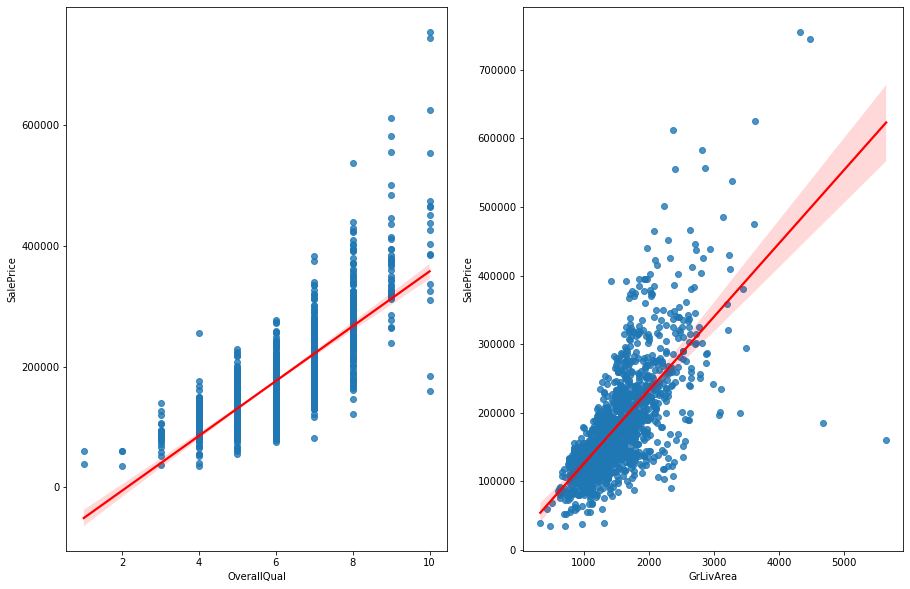

In [16]:
# strong correlation features (> 0.7)

strong_corr_fet_names = corr_features[abs(corr_features) >= 0.7].sort_values(ascending=False).index.tolist()
print('Strongly correlated features: ', strong_corr_fet_names)

strong_fet = train_data_num.loc[:, strong_corr_fet_names + ['SalePrice']]

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

for i, ax in enumerate(ax):
    if i < len(strong_corr_fet_names):
        sns.regplot(x=strong_corr_fet_names[i], y='SalePrice', data=strong_fet, ax=ax, line_kws={'color': 'red'})

Moderate correlation features:  ['GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


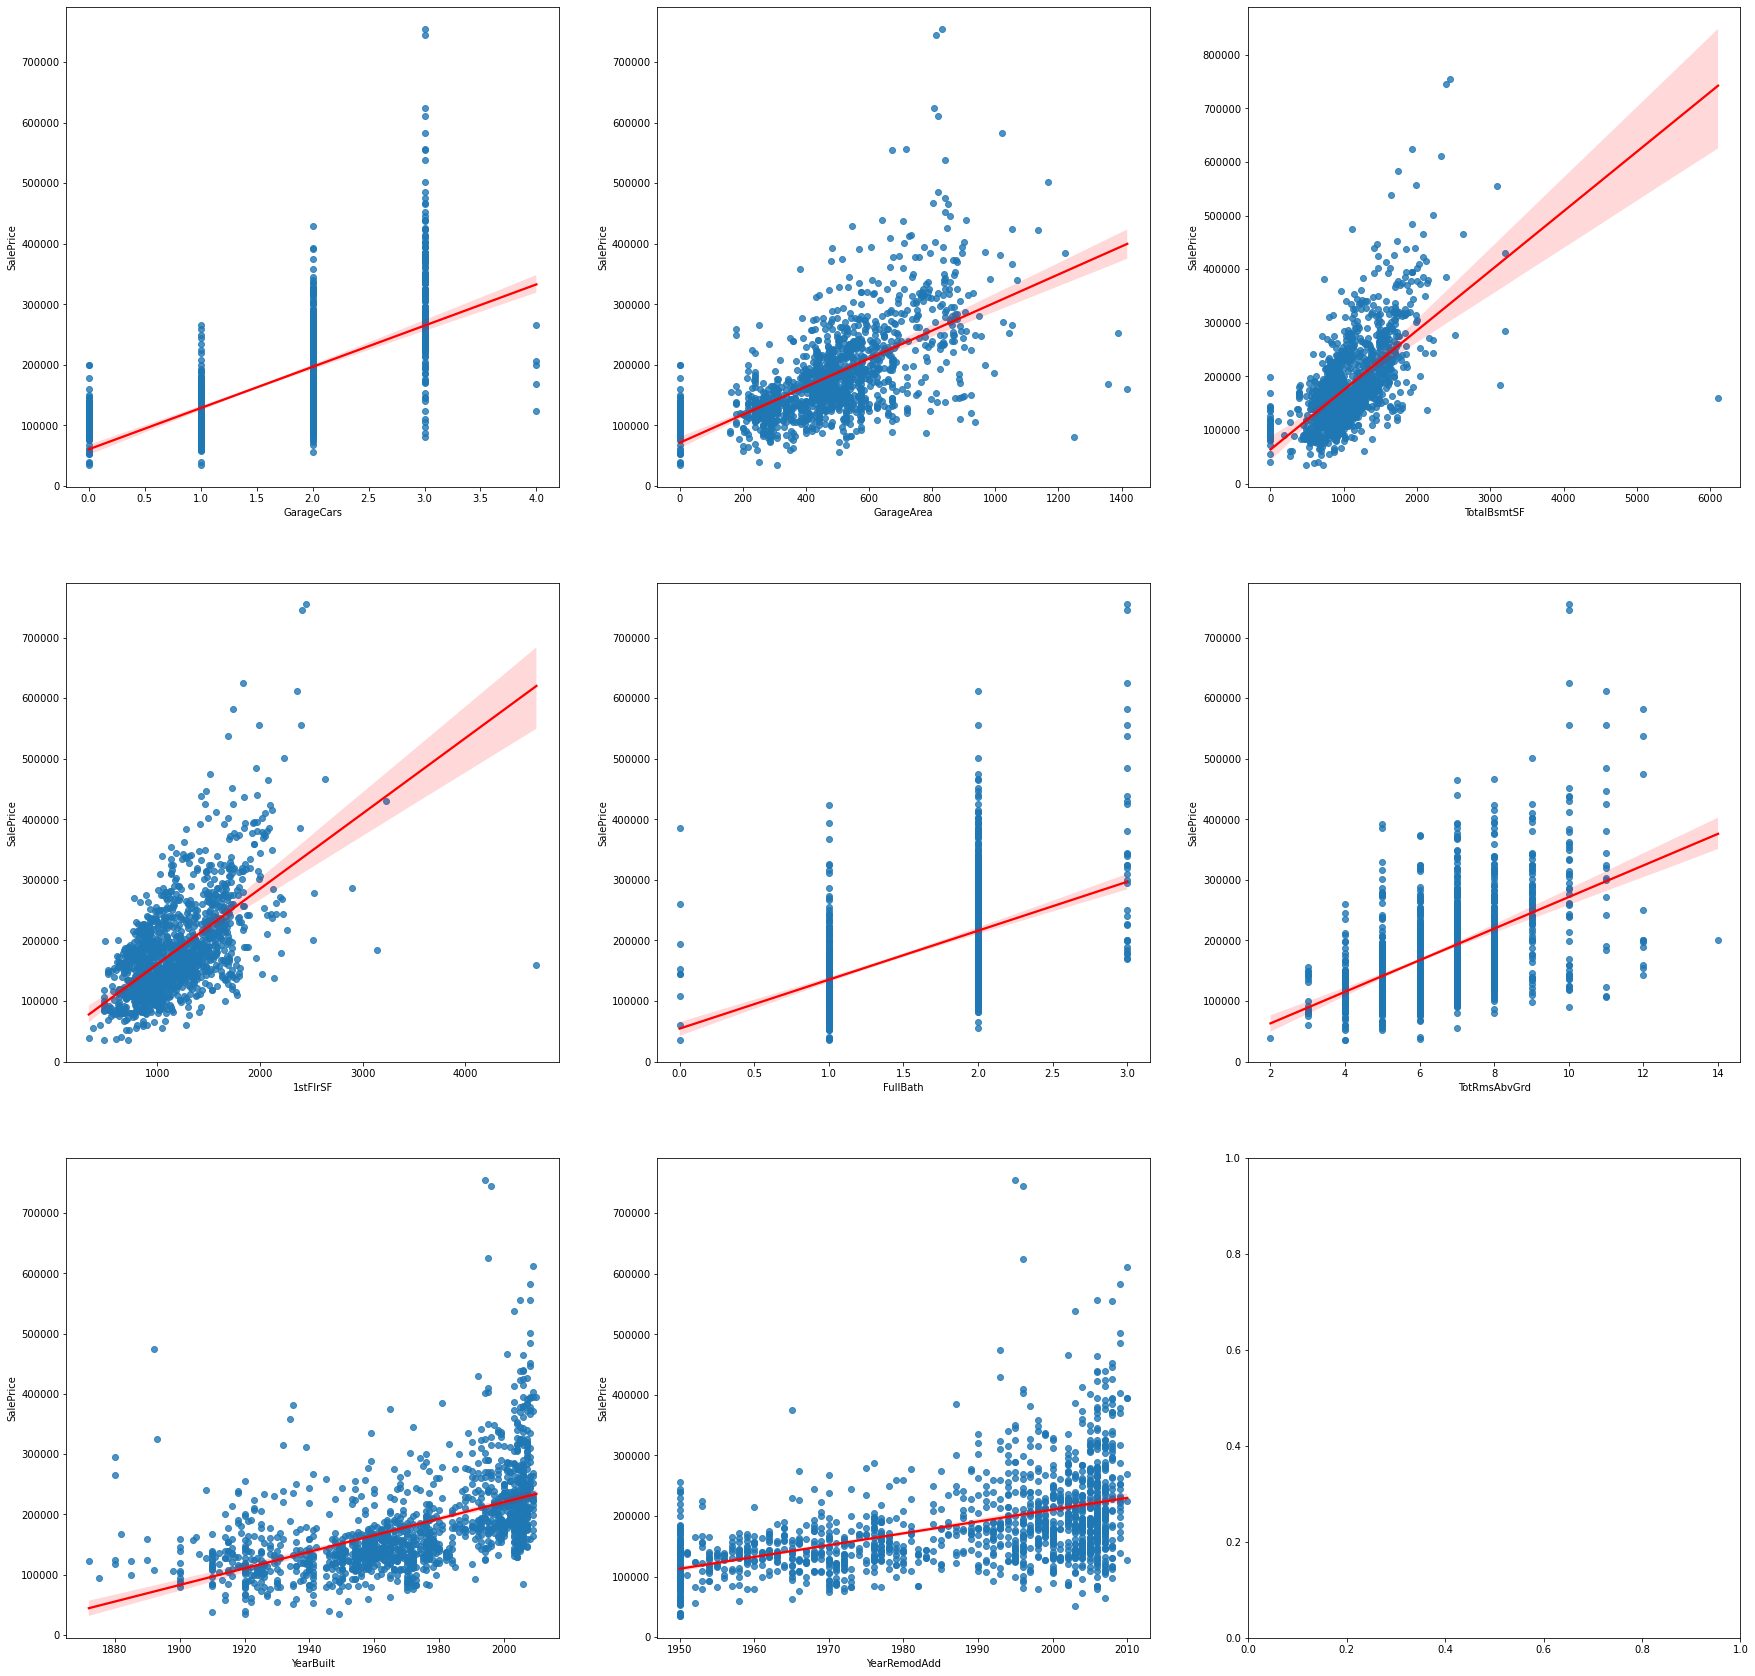

In [17]:
# moderate correlation features ( > 0.5 & < 0.7)

moderate_fet_names = corr_features[(abs(corr_features) >= 0.5) & (abs(corr_features) < 0.7)].sort_values(ascending=False).index.tolist()
print('Moderate correlation features: ', moderate_fet_names)

moderate_fet = train_data_num.loc[:, moderate_fet_names + ["SalePrice"]]

fig, ax = plt.subplots(3, 3, figsize=(30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(moderate_fet_names):
        sns.regplot(x=moderate_fet_names[i], y='SalePrice', data=moderate_fet, ax=ax, line_kws={'color': 'red'})

Weakly correlated features:  ['GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']


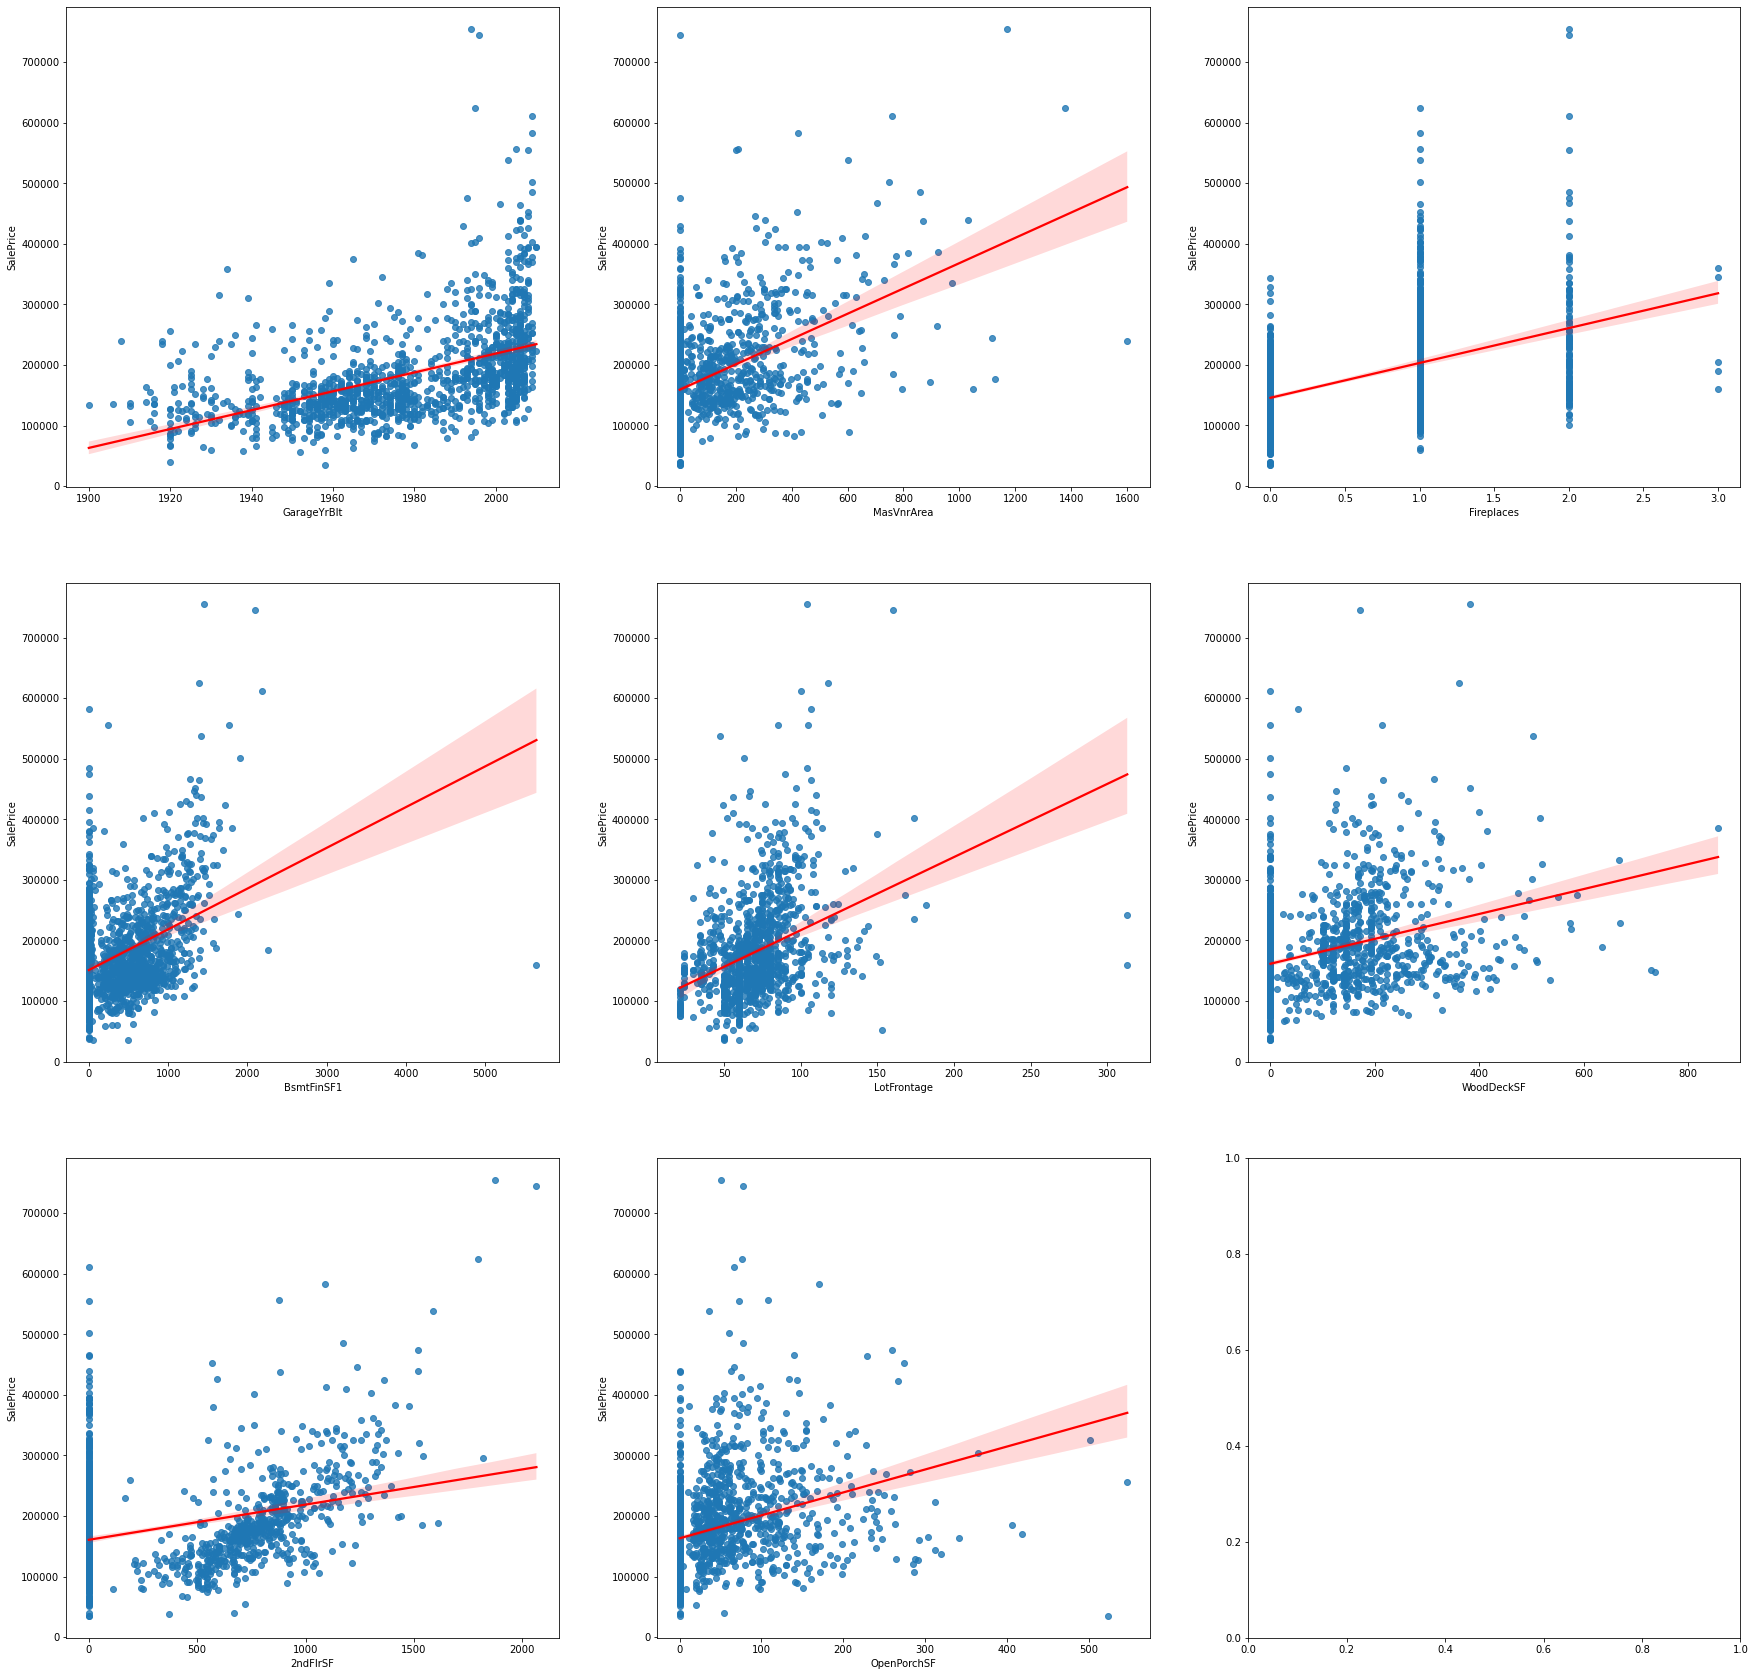

In [18]:
# weakly correlated features ( > 0.3 & < 0.5)

weak_fet_names = corr_features[(abs(corr_features) >= 0.3) & (abs(corr_features) < 0.5)].sort_values(ascending=False).index.tolist()
print('Weakly correlated features: ', weak_fet_names)

weak_fet = train_data_num.loc[:, weak_fet_names + ["SalePrice"]]

fig, ax = plt.subplots(3, 3, figsize=(30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(weak_fet_names):
        sns.regplot(x=weak_fet_names[i], y='SalePrice', data=weak_fet, ax=ax, line_kws={'color': 'red'})

In [19]:
numerical_features = strong_corr_fet_names + moderate_fet_names + weak_fet_names + ['SalePrice']

train_data_num = train_data_num.loc[:, numerical_features]
# excepting SalePrice
test_data_num = test_data_num.loc[:, numerical_features[:-1]]
train_data_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,"2,003.00",196.00,0,706,65.00,0,854,61,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,"1,976.00",0.00,1,978,80.00,298,0,0,181500
2,7,1786,2,608,920,920,2,6,2001,2002,"2,001.00",162.00,1,486,68.00,0,866,42,223500
3,7,1717,3,642,756,961,1,7,1915,1970,"1,998.00",0.00,1,216,60.00,0,756,35,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,"2,000.00",350.00,1,655,84.00,192,1053,84,250000


In [20]:
numerical_features = strong_corr_fet_names + moderate_fet_names + weak_fet_names + ['SalePrice']

train_data_num = train_data_num.loc[:, numerical_features]
# excepting SalePrice
test_data_num = test_data_num.loc[:, numerical_features[:-1]]
train_data_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,"2,003.00",196.00,0,706,65.00,0,854,61,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,"1,976.00",0.00,1,978,80.00,298,0,0,181500
2,7,1786,2,608,920,920,2,6,2001,2002,"2,001.00",162.00,1,486,68.00,0,866,42,223500
3,7,1717,3,642,756,961,1,7,1915,1970,"1,998.00",0.00,1,216,60.00,0,756,35,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,"2,000.00",350.00,1,655,84.00,192,1053,84,250000


We've extracted the most important features for predictions but 18 features is still too many. We can drop features which have strong correlation with each other.

In [21]:
from itertools import combinations

# find pairs of strongly correalted features
cols = train_data_num.columns.tolist()[:-1]
pairs = []

for pair in combinations(range(len(cols)), 2):
    if corr_mat.loc[cols[pair[0]], cols[pair[1]]] >= 0.7:
        pairs.append((cols[pair[0]], cols[pair[1]]))
        
pairs

[('GrLivArea', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('YearBuilt', 'GarageYrBlt')]

## filling empty values

In [22]:
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  MasVnrArea    1452 non-null   float64
 12  Fireplaces    1460 non-null   int64  
 13  BsmtFinSF1    1460 non-null   int64  
 14  LotFrontage   1201 non-null   float64
 15  WoodDeckSF    1460 non-null   int64  
 16  2ndFlrSF      1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [23]:
test_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
 10  GarageYrBlt   1381 non-null   float64
 11  MasVnrArea    1444 non-null   float64
 12  Fireplaces    1459 non-null   int64  
 13  BsmtFinSF1    1458 non-null   float64
 14  LotFrontage   1232 non-null   float64
 15  WoodDeckSF    1459 non-null   int64  
 16  2ndFlrSF      1459 non-null   int64  
 17  OpenPorchSF   1459 non-null   int64  
dtypes: float64(7), int64(11)
mem

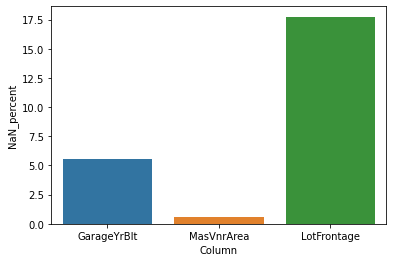

In [24]:
train_nan_cols = train_data_num.columns[train_data_num.isnull().any()].tolist()
train_nan = pd.DataFrame({ 'Column': train_nan_cols,
                         'NaN_percent': [ train_data_num[col].isnull().sum() * 100 / len(train_data_num) 
                                         for col in train_nan_cols] })
sns.barplot(data=train_nan, x='Column', y='NaN_percent');

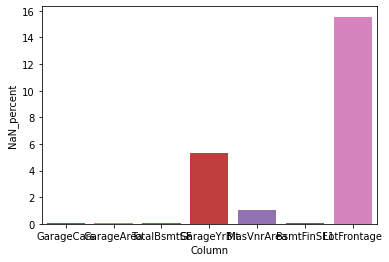

In [25]:
test_nan_cols = test_data_num.columns[test_data_num.isnull().any()].tolist()
test_nan = pd.DataFrame({ 'Column': test_nan_cols,
                         'NaN_percent': [ test_data_num[col].isnull().sum() * 100 / len(test_data_num) 
                                         for col in test_nan_cols] })
sns.barplot(data=test_nan, x='Column', y='NaN_percent');

IndexError: index 2 is out of bounds for axis 0 with size 2

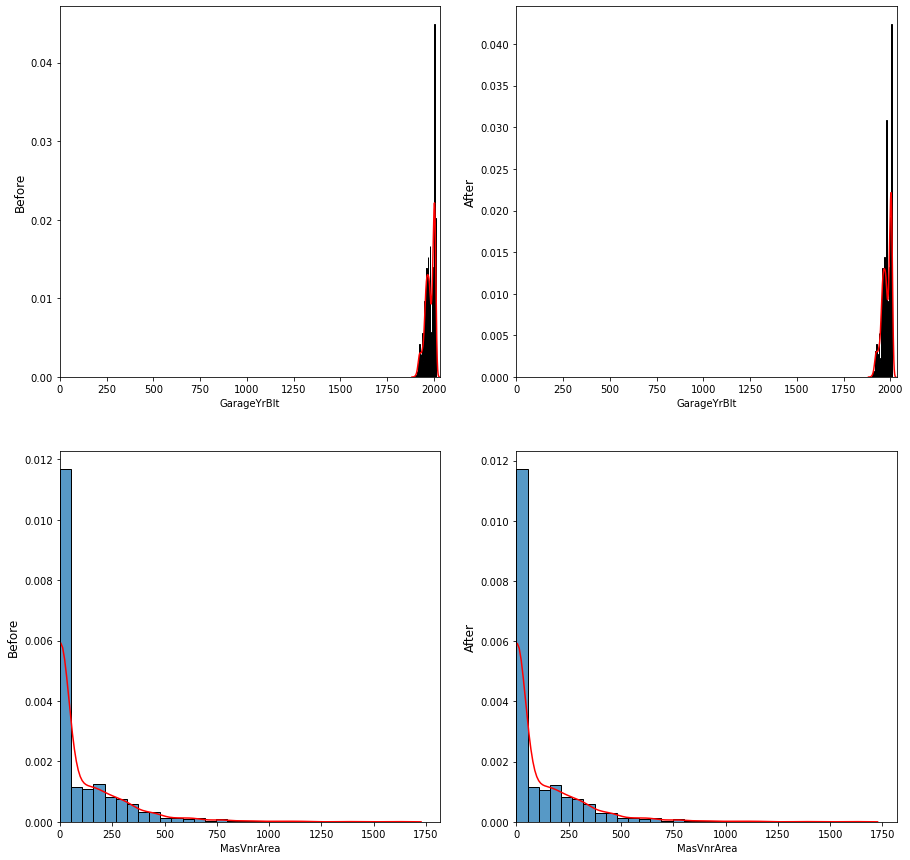

In [26]:
imp = SimpleImputer(strategy='median')
imp_train_data = pd.DataFrame(imp.fit_transform(train_data_num))
imp_train_data.columns = train_data_num.columns

fig, ax = plt.subplots(2,2, figsize=(15, 15))

for i, col in enumerate(train_nan_cols):
    
    # before filling NaN
    bfr = sns.histplot(data=train_data_num, x=col, ax=ax[i, 0], stat='density', bins=30)
    sns.kdeplot(data=train_data_num, x=col, ax=ax[i, 0], color='red')
    bfr.set_xlim(left=0)
    bfr.set_ylabel('Before', fontsize=12)
    
    # after filling NaN
    aftr = sns.histplot(data=imp_train_data, x=col, ax=ax[i, 1], stat='density', bins=30)
    sns.kdeplot(data=train_data_num, x=col, ax=ax[i, 1], color='red')
    aftr.set_xlim(left=0)
    aftr.set_ylabel('After', fontsize=12)


In [28]:
# drop LotFrontage
imp_train_data.drop(['LotFrontage'], axis=1, inplace=True)
test_data_num.drop(['LotFrontage'], axis=1, inplace=True)

# fill NaN in test data
imp = SimpleImputer(strategy='median')
imp_test_data = pd.DataFrame(imp.fit_transform(test_data_num))
imp_test_data.columns = test_data_num.columns

train_data_num = imp_train_data
test_data_num = imp_test_data

In [29]:
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   float64
 1   GrLivArea     1460 non-null   float64
 2   GarageCars    1460 non-null   float64
 3   GarageArea    1460 non-null   float64
 4   TotalBsmtSF   1460 non-null   float64
 5   1stFlrSF      1460 non-null   float64
 6   FullBath      1460 non-null   float64
 7   TotRmsAbvGrd  1460 non-null   float64
 8   YearBuilt     1460 non-null   float64
 9   YearRemodAdd  1460 non-null   float64
 10  GarageYrBlt   1460 non-null   float64
 11  MasVnrArea    1460 non-null   float64
 12  Fireplaces    1460 non-null   float64
 13  BsmtFinSF1    1460 non-null   float64
 14  WoodDeckSF    1460 non-null   float64
 15  2ndFlrSF      1460 non-null   float64
 16  OpenPorchSF   1460 non-null   float64
 17  SalePrice     1460 non-null   float64
dtypes: float64(18)
memory usage:

In [30]:
test_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   float64
 1   GrLivArea     1459 non-null   float64
 2   GarageCars    1459 non-null   float64
 3   GarageArea    1459 non-null   float64
 4   TotalBsmtSF   1459 non-null   float64
 5   1stFlrSF      1459 non-null   float64
 6   FullBath      1459 non-null   float64
 7   TotRmsAbvGrd  1459 non-null   float64
 8   YearBuilt     1459 non-null   float64
 9   YearRemodAdd  1459 non-null   float64
 10  GarageYrBlt   1459 non-null   float64
 11  MasVnrArea    1459 non-null   float64
 12  Fireplaces    1459 non-null   float64
 13  BsmtFinSF1    1459 non-null   float64
 14  WoodDeckSF    1459 non-null   float64
 15  2ndFlrSF      1459 non-null   float64
 16  OpenPorchSF   1459 non-null   float64
dtypes: float64(17)
memory usage: 193.9 KB


#### Outliers

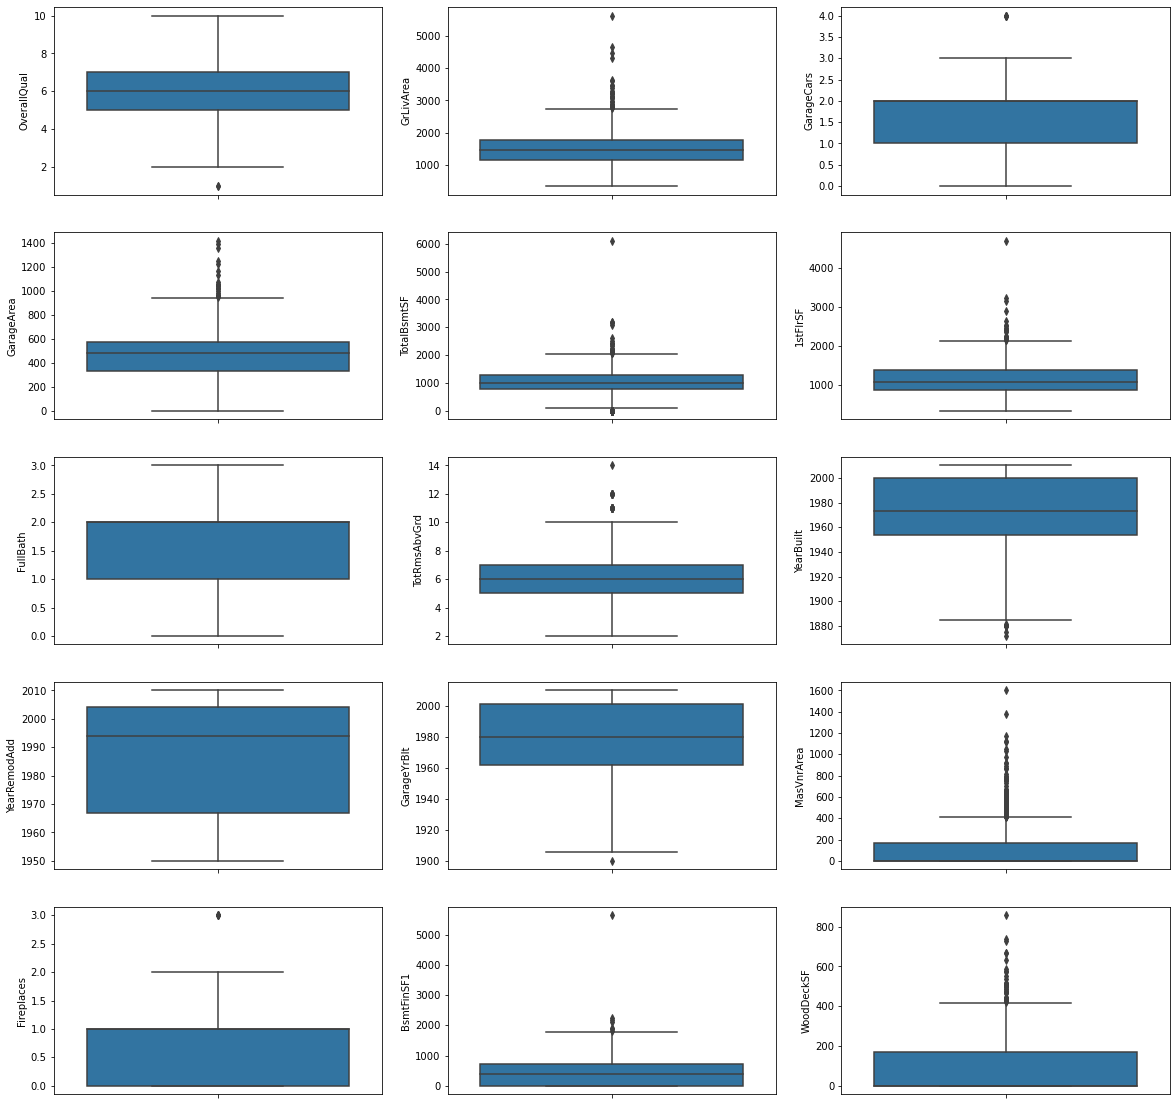

In [31]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
train_num_cols = train_data_num.columns.tolist()[:-1]

for i, ax in enumerate(fig.axes):
    if i < len(train_num_cols):
        sns.boxplot(data=train_data_num, y=train_num_cols[i], ax=ax)

In [32]:
from scipy import stats

for col in train_num_cols:
    z_upper_train = stats.zscore(train_data_num[col]) > 3
    z_lower_train = stats.zscore(train_data_num[col]) < -3
    q1, q3 = train_data_num[col].quantile([0.25, 0.75])
    
    train_data_num[z_upper_train] = q3
    train_data_num[z_lower_train] = q1
    
    z_upper_test = stats.zscore(test_data_num[col]) > 3
    z_lower_test = stats.zscore(test_data_num[col]) < -3
    q1, q3 = test_data_num[col].quantile([0.25, 0.75])
    
    test_data_num[z_upper_test] = q3
    test_data_num[z_lower_test] = q1


Finally lets take a look at numerical data.

In [33]:
train_data_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7.00,"1,710.00",2.00,548.00,856.00,856.00,2.00,8.00,"2,003.00","2,003.00","2,003.00",196.00,0.00,706.00,0.00,854.00,61.00,"208,500.00"
1,6.00,"1,262.00",2.00,460.00,"1,262.00","1,262.00",2.00,6.00,"1,976.00","1,976.00","1,976.00",0.00,1.00,978.00,298.00,0.00,0.00,"181,500.00"
2,7.00,"1,786.00",2.00,608.00,920.00,920.00,2.00,6.00,"2,001.00","2,002.00","2,001.00",162.00,1.00,486.00,0.00,866.00,42.00,"223,500.00"
3,7.00,"1,717.00",3.00,642.00,756.00,961.00,1.00,7.00,"1,915.00","1,970.00","1,998.00",0.00,1.00,216.00,0.00,756.00,35.00,"140,000.00"
4,8.00,"2,198.00",3.00,836.00,"1,145.00","1,145.00",2.00,9.00,"2,000.00","2,000.00","2,000.00",350.00,1.00,655.00,192.00,"1,053.00",84.00,"250,000.00"


#### Categorical Data

##### Feature extracting

In [34]:
categorical_features = [col for col in train_data.columns if train_data.dtypes[col] == 'object']

# training data
train_data_cat = train_data[categorical_features + ['SalePrice']]

# test data
test_data_cat = test_data[categorical_features]

train_data_cat.shape, test_data_cat.shape

((1460, 44), (1459, 43))

C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xa

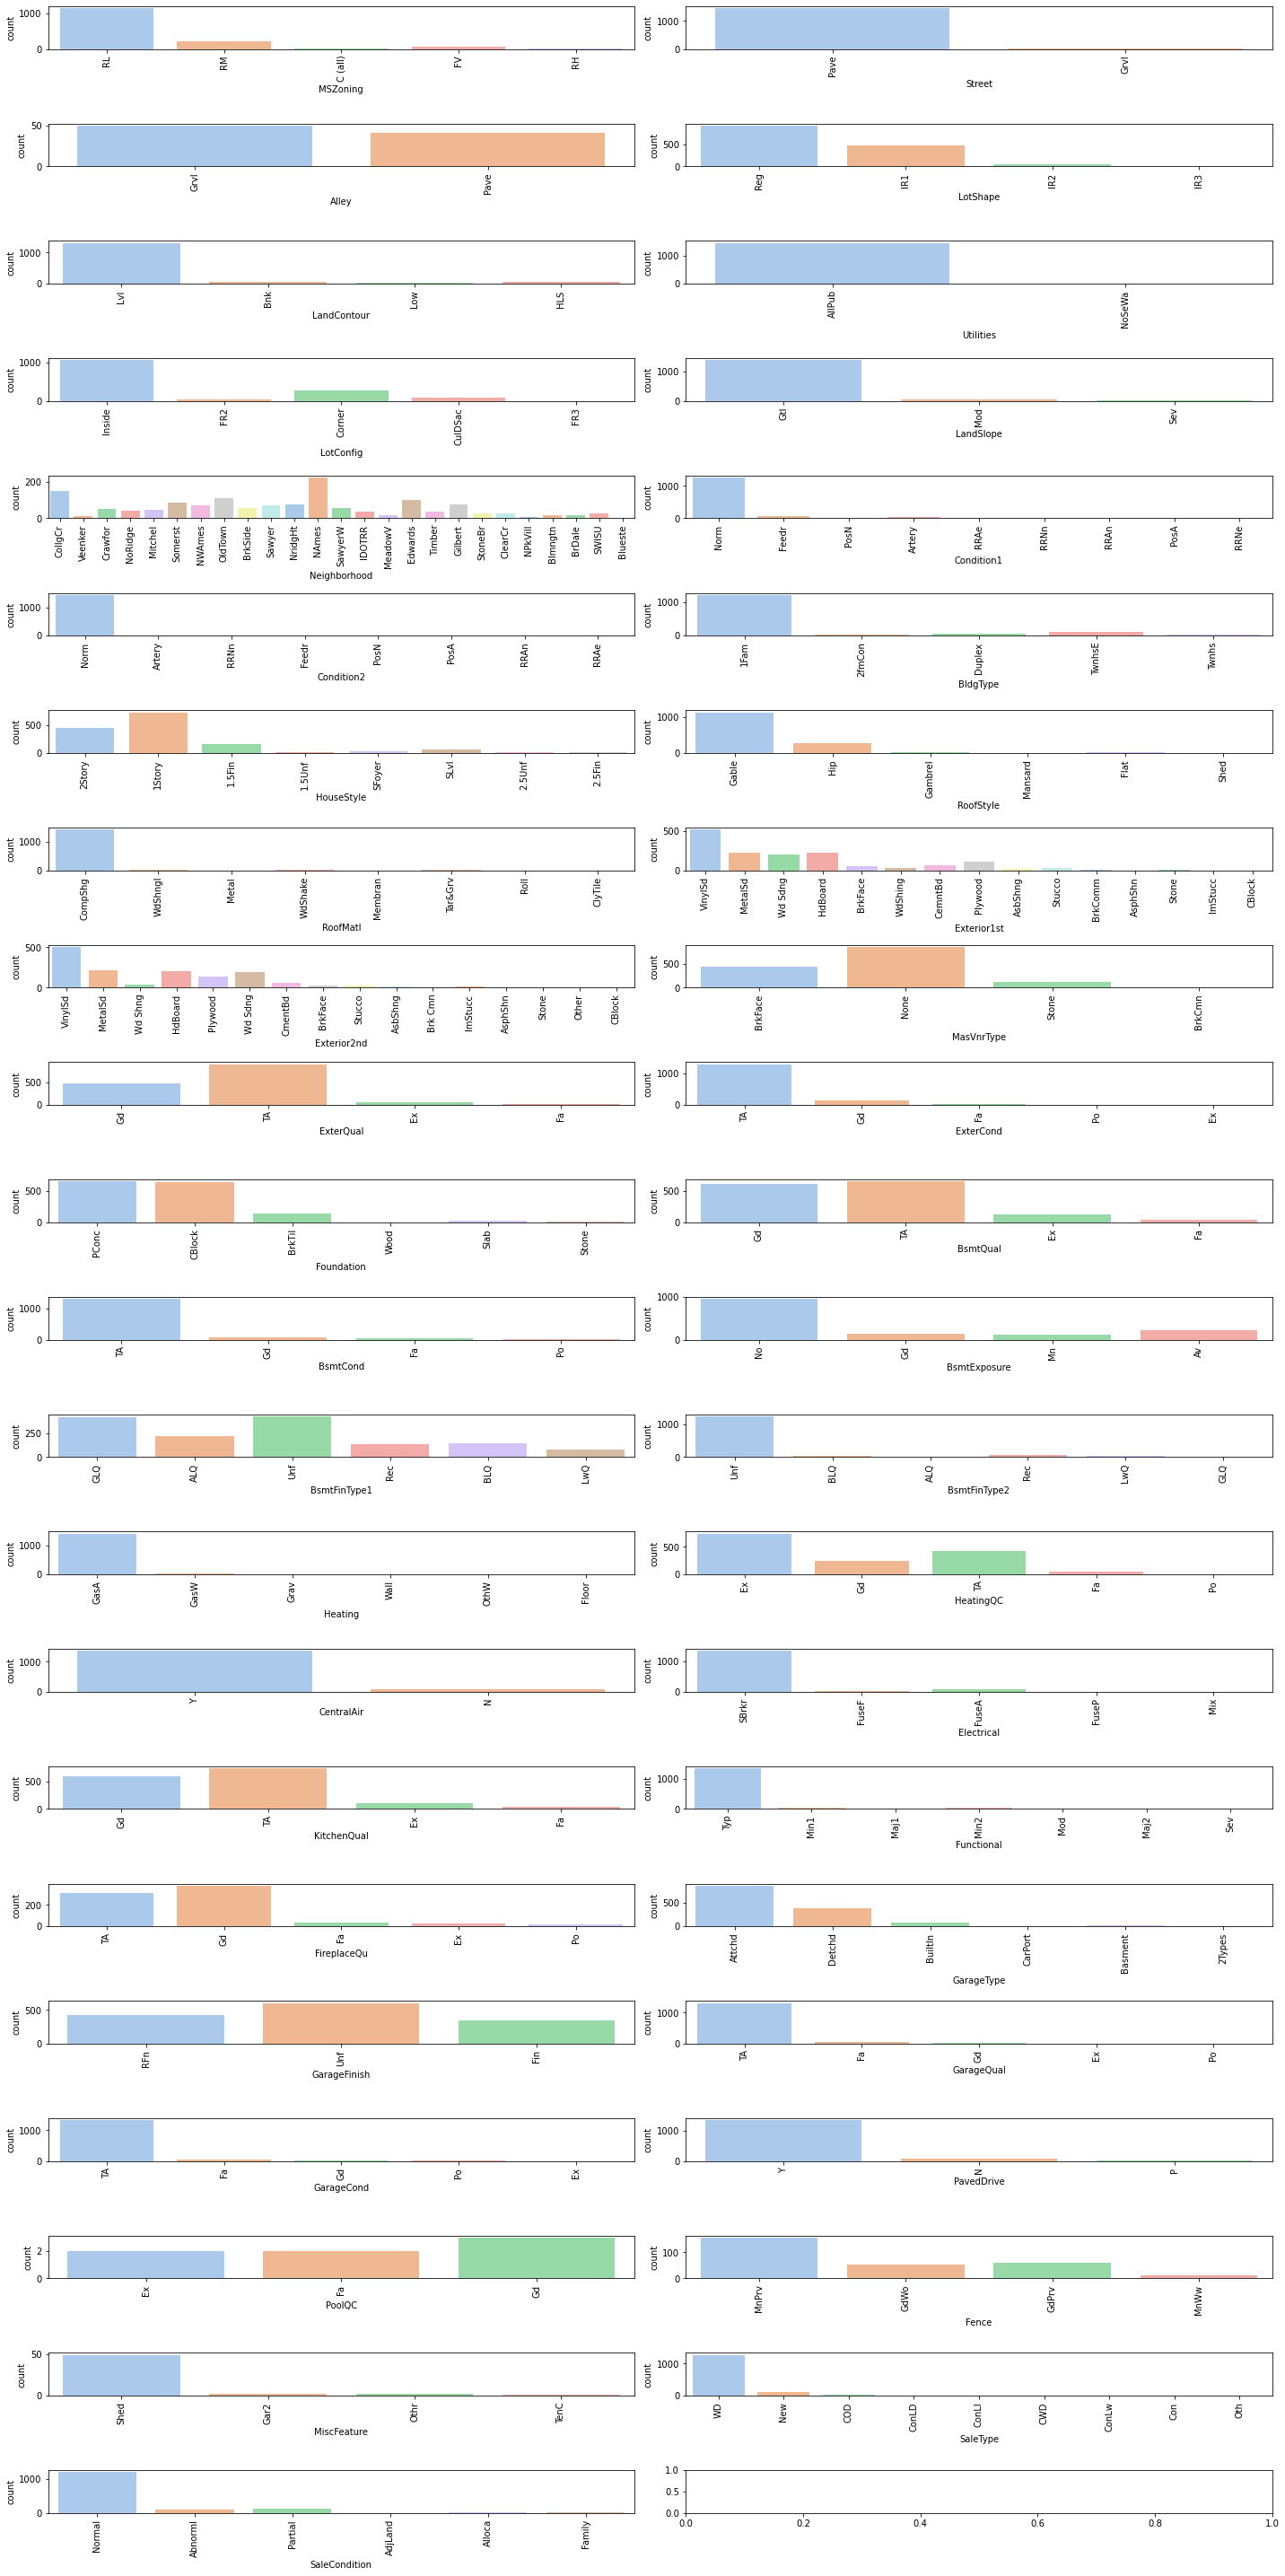

In [35]:
fig, ax = plt.subplots(round(len(train_data_cat.columns) / 2), 2, figsize=(20, 40))

for i, ax in enumerate(fig.axes):
    if i < len(train_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(data=train_data_cat, x=train_data_cat.columns[i], ax=ax, palette='pastel')
fig.tight_layout()

In [36]:
features_to_drop = ['Street', 
                    'LandContour', 
                    'Utilities', 
                    'LandSlope', 
                    'Condition2', 
                    'RoofMatl', 
                    'BsmtCond', 
                    'BsmtFinType2', 
                    'Heating', 
                    'CentralAir', 
                    'Electrical',
                    'Functional',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive'
                   ]

train_data_cat.drop(features_to_drop, axis=1, inplace=True)
test_data_cat.drop(features_to_drop, axis=1, inplace=True)

train_data_cat.shape, test_data_cat.shape

C:\Users\jaysa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((1460, 29), (1459, 28))

We are left now with 28 features in both data sets

Next we will look at the variation of the target variable with respect to each categorical feature.

C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\jaysa\AppData\Local\Temp/ipykernel_12092/1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xa

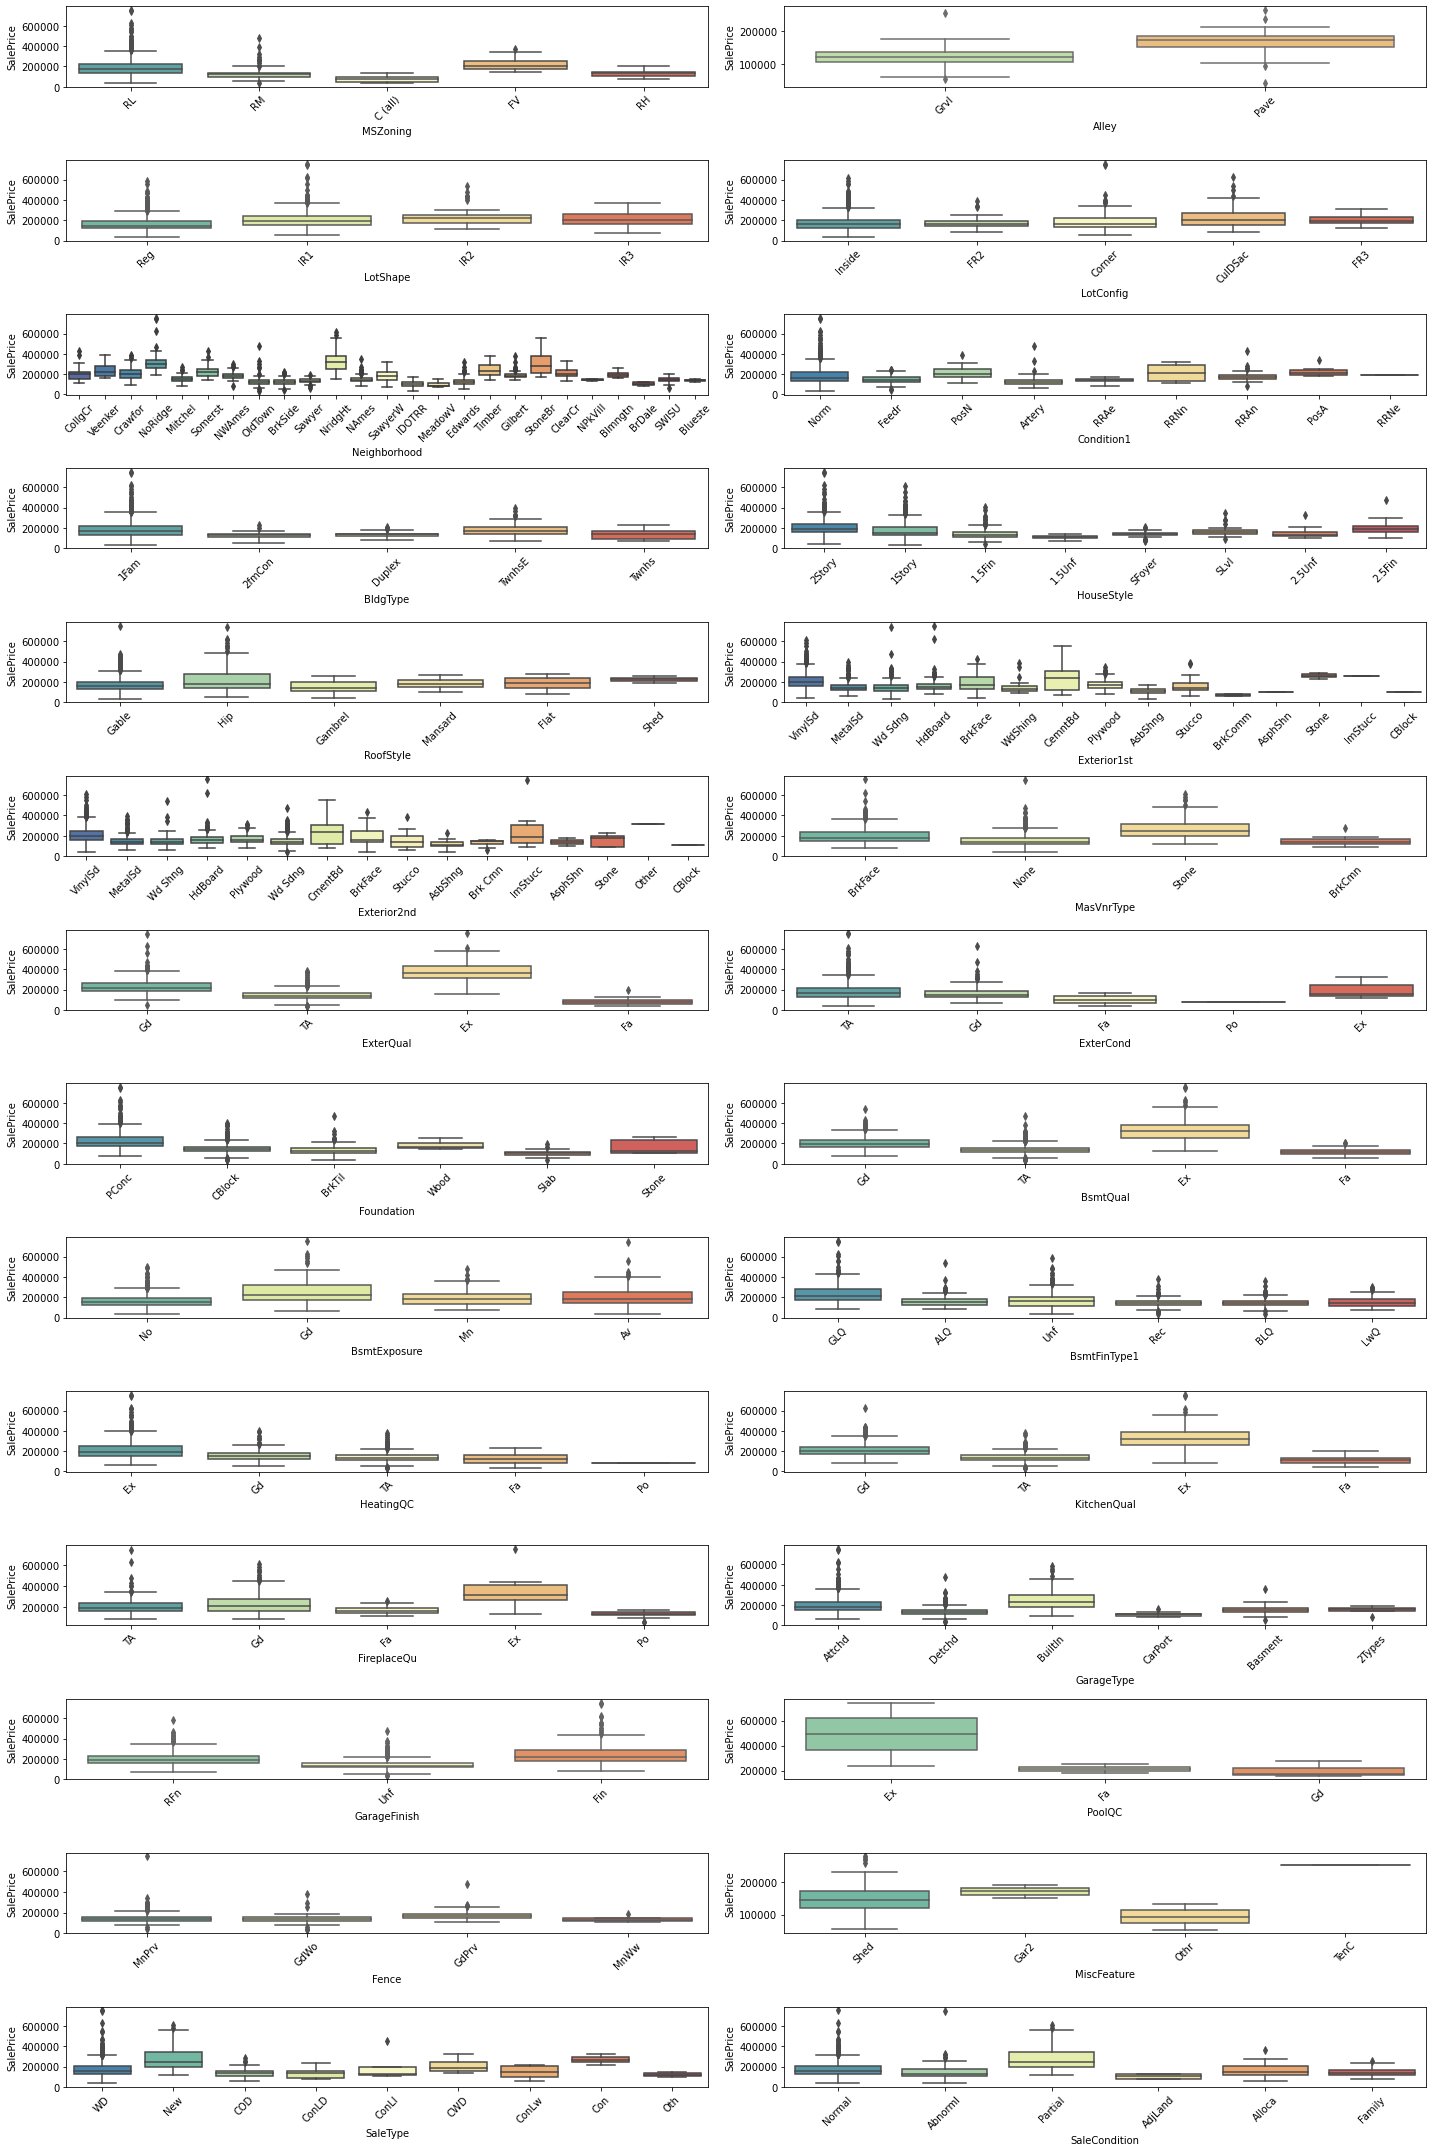

In [37]:
fig, ax = plt.subplots(round(len(train_data_cat.columns) / 2), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(train_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data=train_data_cat, x=train_data_cat.columns[i], y='SalePrice', ax=ax, palette='Spectral_r')

fig.tight_layout()

It seems a few features have similar distributions of SalePrice:
* Exterior1st and Exterior2nd
* ExterQual and MasVnrType
* BsmtQual and BsmtExposure

Based on the similarity of their distributions, we can say that these features are highly correlated with each other. Therefore, we can drop one feature from each pair.

In [38]:
train_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)
test_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)

train_data_cat.shape, test_data_cat.shape

C:\Users\jaysa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((1460, 26), (1459, 25))

#### Filling Empty Values

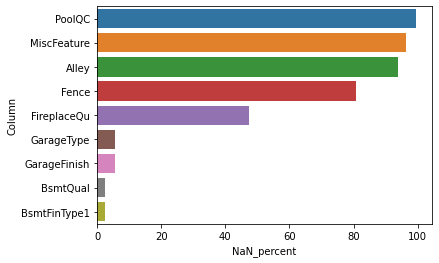

In [39]:
cols_null_train = train_data_cat.columns[train_data_cat.isnull().any()]

nan_counts_train = pd.DataFrame({
    'Column': cols_null_train,
    'NaN_percent': [train_data_cat[col].isnull().sum()*100 / len(train_data_cat) 
                    for col in cols_null_train]
})

nan_counts_train.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=True)
sns.barplot(data=nan_counts_train, y='Column', x='NaN_percent');

As there is 45% of missing values from five features filling empty values by feature's mode will significantly modify distribution so we will drop them.

In [40]:
train_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

C:\Users\jaysa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Filling empty values by feature's mode in other feature

In [41]:
for col in ['GarageType', 'GarageFinish', 'BsmtQual', 'BsmtFinType1']:
    train_data_cat[col].fillna(train_data_cat[col].mode()[0], inplace=True)
    test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)

C:\Users\jaysa\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
train_data_cat.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [43]:
test_data_cat.isnull().sum()

MSZoning         4
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      1
GarageType       0
GarageFinish     0
SaleType         1
SaleCondition    0
dtype: int64

In [44]:
test_data_cat.isnull().sum()

MSZoning         4
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      1
GarageType       0
GarageFinish     0
SaleType         1
SaleCondition    0
dtype: int64

In [45]:
cols_null_test = test_data_cat.columns[test_data_cat.isnull().any()]

for col in cols_null_test:
    test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)

test_data_cat.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

Transform Categories

In [47]:
train_data_cat.drop(['SalePrice'], axis=1, inplace=True)

train_cat_dummies = pd.get_dummies(train_data_cat)
train_cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
test_cat_dummies = pd.get_dummies(test_data_cat)
test_cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
dif = [col for col in train_cat_dummies.columns if col not in test_cat_dummies.columns]
print('Found differences in: ', dif)

Found differences in:  ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']


In [52]:
train_cat_dummies.drop(dif, axis=1, inplace=True)

train_cat_dummies.shape, test_cat_dummies.shape

((1460, 137), (1459, 137))

In [53]:
train_data_new = pd.concat([train_data_num, train_cat_dummies], axis=1)
test_data_new = pd.concat([test_data_num, test_cat_dummies], axis=1)

train_data_new.shape, test_data_new.shape

((1460, 155), (1459, 154))

### Feature Engineering

Now we can create features that can help us improve out predictions.

In [54]:
# Age of house from the year of construction
train_data_new['Age'] = train_data_new['YearBuilt'].max() - train_data_new['YearBuilt']
test_data_new['Age'] = test_data_new['YearBuilt'].max() - test_data_new['YearBuilt']


In [55]:
# Age since renovating
train_data_new['Renovate'] = train_data_new['YearRemodAdd'] - train_data_new['YearBuilt']
test_data_new['Renovate'] = test_data_new['YearRemodAdd'] - test_data_new['YearBuilt']

train_data_new['Renovate'] = np.where(train_data_new['Renovate'] < 0, 0, train_data_new['Renovate'])
test_data_new['Renovate'] = np.where(test_data_new['Renovate'] < 0, 0, test_data_new['Renovate'])

# Drop YearBuilt
train_data_new.drop(['YearBuilt'], axis=1, inplace=True)
test_data_new.drop(['YearBuilt'], axis=1, inplace=True)
# Drop YearRemodAdd
train_data_new.drop(['YearRemodAdd'], axis=1, inplace=True)
test_data_new.drop(['YearRemodAdd'], axis=1, inplace=True)

In [56]:
# Artificial feature combines OverallQual and GrLivArea
train_data_new['Qual_Area'] = train_data_new['OverallQual'] * train_data_new['GrLivArea']
test_data_new['Qual_Area'] = test_data_new['OverallQual'] * test_data_new['GrLivArea']

Now we look at continuous features. We try to mitigate the strong variance of some variables by using log transformation. It make predictions easier for our model because of normalizing data.

In [57]:
cont_features = train_data_new.select_dtypes(include=['int', 'float']).drop(['SalePrice'], axis=1).columns.tolist()

cont_data = train_data_new.loc[:, cont_features]
cont_data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,Age,Renovate,Qual_Area
0,7.00,"1,710.00",2.00,548.00,856.00,856.00,2.00,8.00,"2,003.00",196.00,0.00,706.00,0.00,854.00,61.00,7.00,0.00,"11,970.00"
1,6.00,"1,262.00",2.00,460.00,"1,262.00","1,262.00",2.00,6.00,"1,976.00",0.00,1.00,978.00,298.00,0.00,0.00,34.00,0.00,"7,572.00"
2,7.00,"1,786.00",2.00,608.00,920.00,920.00,2.00,6.00,"2,001.00",162.00,1.00,486.00,0.00,866.00,42.00,9.00,1.00,"12,502.00"
3,7.00,"1,717.00",3.00,642.00,756.00,961.00,1.00,7.00,"1,998.00",0.00,1.00,216.00,0.00,756.00,35.00,95.00,55.00,"12,019.00"
4,8.00,"2,198.00",3.00,836.00,"1,145.00","1,145.00",2.00,9.00,"2,000.00",350.00,1.00,655.00,192.00,"1,053.00",84.00,10.00,0.00,"17,584.00"


In [58]:
skew_data = pd.DataFrame({
    'Column': cont_features,
    'Skew': abs(cont_data.skew())
}).sort_values('Skew', ascending=False)

skew_data

,Column,Skew
OverallQual,OverallQual,6.61
TotRmsAbvGrd,TotRmsAbvGrd,6.60
FullBath,FullBath,6.59
GarageCars,GarageCars,6.59
Fireplaces,Fireplaces,6.58
GarageYrBlt,GarageYrBlt,3.69
Age,Age,3.68
MasVnrArea,MasVnrArea,2.35
Renovate,Renovate,2.06
OpenPorchSF,OpenPorchSF,1.45


In [60]:
skew_features = skew_data[skew_data['Skew'] > 0.5]['Column'].tolist()
skew_features

['OverallQual',
 'TotRmsAbvGrd',
 'FullBath',
 'GarageCars',
 'Fireplaces',
 'GarageYrBlt',
 'Age',
 'MasVnrArea',
 'Renovate',
 'OpenPorchSF',
 'Qual_Area',
 'WoodDeckSF',
 '2ndFlrSF',
 'BsmtFinSF1']

In [61]:
# Adding 1 to avoid logarithm of 0
for col in skew_features:
    train_data_new[col] = np.log(train_data_new[col] + 1)
    test_data_new[col] = np.log(test_data_new[col] + 1)
    

Looking at distribution from the beginning.We can see that SalePrice feature is skewed too so we use log tranformation for it.

In [62]:
train_data_new['SalePriceLog'] = np.log(train_data_new['SalePrice'])

train_data_new.drop('SalePrice', axis=1, inplace=True)

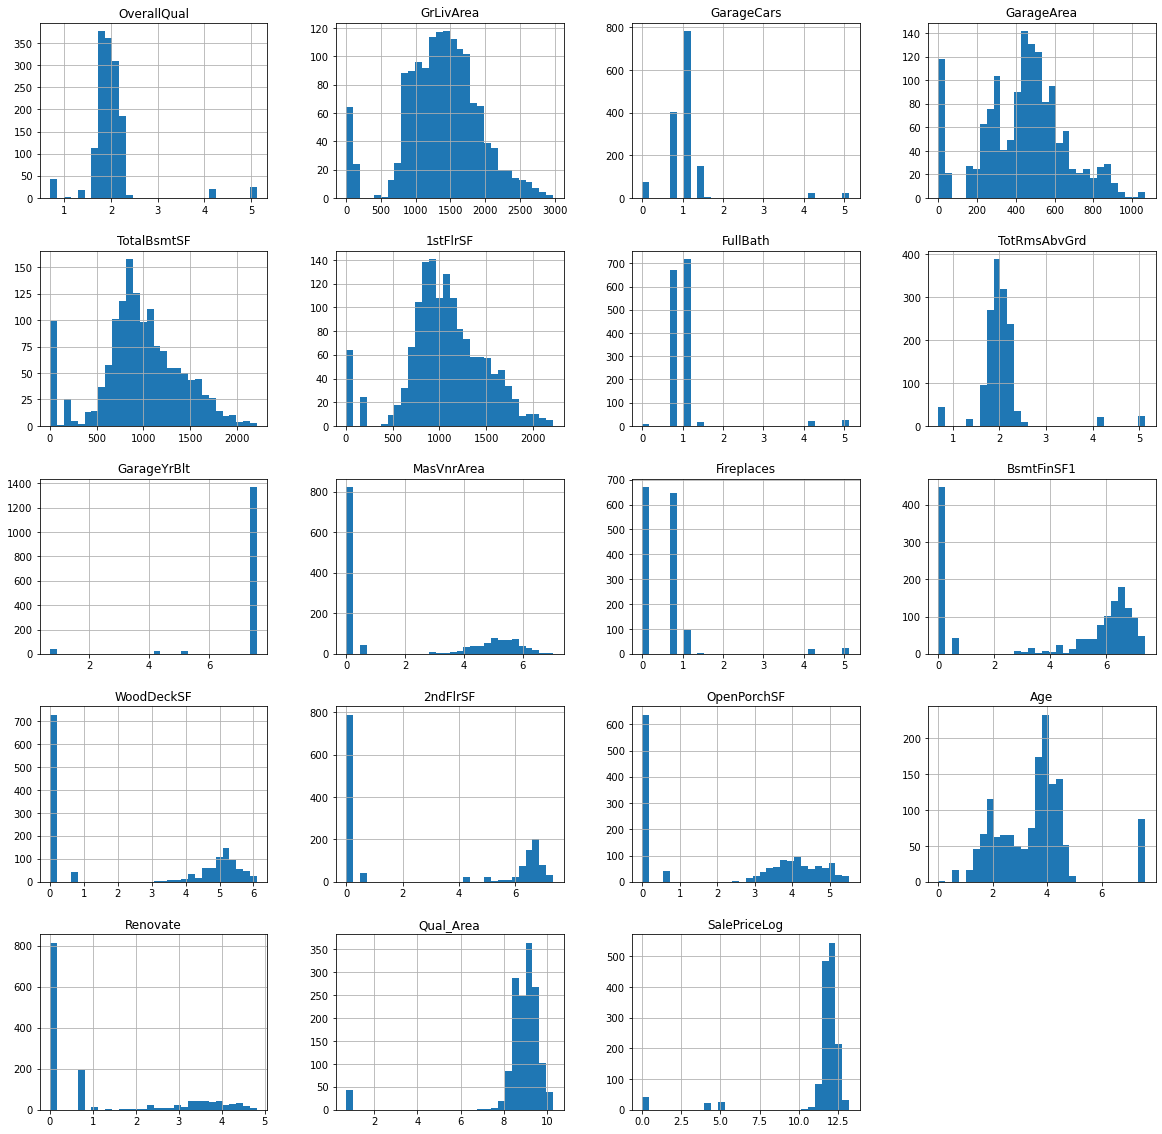

In [63]:
train_data_new_num = train_data_new.select_dtypes(include=['int', 'float'])
train_data_new_num.hist(figsize=(20, 20), bins=30);

## Modeling

### Preparing Data

Before fitting and evaluating models we need to transform and split our data.

In [64]:
X = train_data_new.drop(['SalePriceLog'], axis=1)
y = train_data_new['SalePriceLog']

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (1460, 155)
y shape:  (1460,)


In [65]:
# Standardize data
scaler = StandardScaler().fit(X)

In [66]:
import statsmodels.api as sm

def backward_elimination(X, y, threshold=0.05):
    features = X.columns.tolist()
    
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[features]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold:
            changed = True
            worst_fet = pvalues.idxmax()
            features.remove(worst_fet)
        if not changed:
            break
            
    return features

In [67]:
selected_features = backward_elimination(X, y)
selected_features

C:\Users\jaysa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaysa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaysa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaysa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaysa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'BsmtFinSF1',
 'WoodDeckSF',
 'MSZoning_C (all)',
 'MSZoning_RL',
 'LotConfig_CulDSac',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_RRAe',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Unf',
 'RoofStyle_Flat',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_VinylSd',
 'ExterCond_Ex',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtFinType1_LwQ',
 'HeatingQC_Ex',
 'HeatingQC_Gd',
 'KitchenQual_Ex',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'SaleType_COD',
 'SaleType_WD',
 'SaleCondition_AdjLand',
 'SaleCondition_Normal',
 'Age',
 'Renovate',
 'Qual_Area']

In [68]:
X = X.loc[:, selected_features]
test_data_new = test_data_new.loc[:, selected_features]

Now we can devide data into test and validation data

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)
print('Train size:', X_train.shape, y_train.shape)
print('Validation size:', X_val.shape, y_val.shape)

Train size: (1241, 51) (1241,)
Validation size: (219, 51) (219,)


## Predict and Solve

Now we are ready to use models for predicting houses prices. We will estimate quality of our predictions with 2 metrics: RMSE (main metric, checking in Kaggle submission) and $R^2$ score. Next we will use the following models:
* Linear Regression
* Ridge Regression (L2 penalty)
* Lasso Regression (L1 penalty)
* SVR
* Decision Tree
* Random Forest
* XGBoost
* Gradient Boosting
* CatBoost

In [70]:
# Creating RMSE

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Creating estimating function

r2_list = []
rmse_list = []

def get_metrics(model):
    r2 = model.score(X_val, y_val)
    rmse = rmse_score(y_val, model.predict(X_val))
    r2_list.append(r2)
    rmse_list.append(rmse)
    print('Cross validation score:', cross_val_score(model, X_train, y_train, cv=5))
    print('R2 score:', r2)
    print('RMSE:', rmse)

### Linear Regression 

In [71]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

get_metrics(linreg)

Cross validation score: [0.99565982 0.99748178 0.99646127 0.99763632 0.99570321]
R2 score: 0.9974120402142617
RMSE: 0.1341418791388714


### Ridge Regression

In [72]:
ridge_reg = Ridge(alpha=.001)
ridge_reg.fit(X_train, y_train)

get_metrics(ridge_reg)

Cross validation score: [0.99565991 0.99748186 0.99646121 0.99763652 0.99570312]
R2 score: 0.9974122309083171
RMSE: 0.13413693691946005


### Lasso Regression

In [73]:
ridge_reg = Ridge(alpha=.001)
ridge_reg.fit(X_train, y_train)

get_metrics(ridge_reg)

Cross validation score: [0.99565991 0.99748186 0.99646121 0.99763652 0.99570312]
R2 score: 0.9974122309083171
RMSE: 0.13413693691946005


### SVR

In [74]:
svr = SVR()
svr.fit(X_train, y_train)

get_metrics(svr)

Cross validation score: [0.91969334 0.93049102 0.92279712 0.9437896  0.90995712]
R2 score: 0.9315282640921203
RMSE: 0.6899876116442099


### Decision Tree

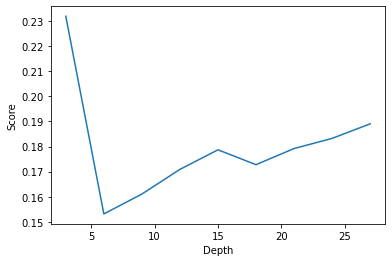

In [75]:
depths = []
scores = []

for d in range(3, 30, 3):
    m = DecisionTreeRegressor(max_depth=d).fit(X_train, y_train)
    depths.append(d)
    scores.append(rmse_score(y_val, m.predict(X_val)))

dt_scores = pd.DataFrame({
    'Depth': depths,
    'Score': scores
})
sns.lineplot(data=dt_scores, x='Depth', y='Score');

In [76]:
tree_depth = int(dt_scores.loc[dt_scores['Score'] == dt_scores['Score'].min(), 'Depth'])
tree_depth

6

In [78]:
dt = DecisionTreeRegressor(max_depth=tree_depth)
dt.fit(X_train, y_train)

get_metrics(dt)

Cross validation score: [0.99051476 0.99410694 0.99437886 0.99631766 0.99273339]
R2 score: 0.9965899139272438
RMSE: 0.15398141088680528


### Random Forest

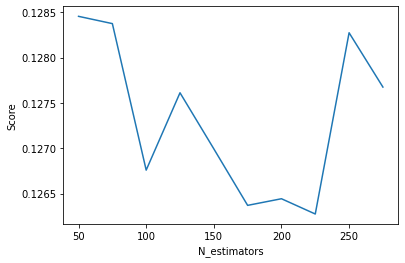

In [79]:
n_est = []
rf_rmse = []

for n in range(50, 300, 25):
    m = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    n_est.append(n)
    rf_rmse.append(rmse_score(y_val, m.predict(X_val)))

rf_scores = pd.DataFrame({
    'N_estimators': n_est,
    'Score': rf_rmse
})
sns.lineplot(data=rf_scores, x='N_estimators', y='Score');

In [80]:
n_estimators = int(rf_scores.loc[rf_scores['Score'] == rf_scores['Score'].min(), 'N_estimators'])
n_estimators

225

In [81]:
rf = RandomForestRegressor(n_estimators=n_estimators)
rf.fit(X_train, y_train)

get_metrics(rf)

Cross validation score: [0.99534306 0.99686755 0.99644796 0.99792177 0.99515273]
R2 score: 0.9976873336606709
RMSE: 0.12680667462833792


### XGBoost

In [82]:
xgb = XGBRegressor(n_estimators=n_estimators)
xgb.fit(X_train, y_train)

get_metrics(xgb)

Cross validation score: [0.99509567 0.99666293 0.99644675 0.99755681 0.99522751]
R2 score: 0.9974188322456503
RMSE: 0.13396573760238203


### Gradient Boosting

In [83]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

get_metrics(gbr)

Cross validation score: [0.99574577 0.99719545 0.99684993 0.99834115 0.99530594]
R2 score: 0.9977724627284644
RMSE: 0.12445092068411932


### CatBoost

In [84]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train, verbose=0)

cbr_pred = cbr.predict(X_val)

cbr_r2 = r2_score(y_val, cbr_pred)
cbr_rmse = rmse_score(y_val, cbr_pred)
r2_list.append(cbr_r2)
rmse_list.append(cbr_rmse)

print('R2 score:', cbr_r2)
print('RMSE score:', cbr_rmse)

R2 score: 0.9975274121036258
RMSE score: 0.13111775167537398


 Linear Regression
* Ridge Regression (L2 penalty)
* Lasso Regression (L1 penalty)
* SVR
* Decision Tree
* Random Forest
* XGBoost
* Gradient Boosting
* CatBoost

From the table above we can see that CatBoost Regressor is the best model for our predictions. Now we can make test data predictions.

## Prediction

In [85]:
y_pred = np.exp(cbr.predict(test_data_new))


submission = pd.DataFrame({
    'Id': id_test,
    'SalePrice': y_pred
})

submission.head()

,Id,SalePrice
0,1461,"113,944.44"
1,1462,"157,267.50"
2,1463,"185,793.93"
3,1464,"200,113.98"
4,1465,"192,281.08"


In [86]:
submission.to_csv("submission.csv", index=False)